In [1]:
#Not all of these imports are actually used in the current iteration of this notebook but may be used in the future
import tweepy as tw
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import integrate
import pandas as pd
import collections
import threading
from datetime import datetime, timedelta
from customFunctions import *
import operator
import csv
from datetime import datetime

SyntaxError: invalid syntax (customFunctions.py, line 61)

In [2]:
#Enter your own Twitter API credentials here
auth = tw.AppAuthHandler("Yours here", "Yours here")
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
HouseR = [[]]
HouseD = [[]]
HouseO = [[]]
SenateR = [[]]
SenateD = [[]]
SenateO = [[]]

with open('LookupSheets/116thCongressTwitter.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

        for row in csv_reader:
            # screenname, name, party code, state icps, year born, dw nom dim 1, dw nom dim 2
            info = [row[2], row[0], row[8], row[4], row[9], row[10], row[11]]
            
            if(row[1] == "Rep"):
                if(row[8] == "200"): HouseR = HouseR + [info]
                elif(row[8] == "100"): HouseD = HouseD + [info]
                else: HouseO = HouseO + [info]
                    
            if(row[1] == "Sen"):
                if(row[8] == "200"): SenateR = SenateR + [info]
                elif(row[8] == "100"): SenateD = SenateD + [info]
                else: SenateO = SenateO + [info]
                    
HouseR = HouseR[1:]
HouseD = HouseD[1:]
HouseO = HouseO[1:]
SenateR = SenateR[1:]
SenateD = SenateD[1:]
SenateO = SenateO[1:]

In [4]:
end = datetime.today() - timedelta(1)
start = end - timedelta(days=84)
days = int(str(end - start).split()[0])

t1,w1 = dataForPlot(HouseR, "corona", api, [start,end], days)
t2,w2 = dataForPlot(HouseR, "covid", api, [start,end], days)

t3,w3 = dataForPlot(HouseD, "corona", api, [start,end], days)
t4,w4 = dataForPlot(HouseD, "covid", api, [start,end], days)

t5,w5 = dataForPlot(SenateR, "corona", api, [start,end], days)
t6,w6 = dataForPlot(SenateR, "covid", api, [start,end], days)

t7,w7 = dataForPlot(SenateD, "corona", api, [start,end], days)
t8,w8 = dataForPlot(SenateD, "covid", api, [start,end], days)

In [5]:
t9,w9 = dataForPlot(HouseR, "wuhan virus", api, [start,end], days)
t10,w10 = dataForPlot(HouseR, "chinese virus", api, [start,end], days)

t11,w11 = dataForPlot(HouseD, "wuhan virus", api, [start,end], days)
t12,w12 = dataForPlot(HouseD, "chinese virus", api, [start,end], days)

t13,w13 = dataForPlot(SenateR, "wuhan virus", api, [start,end], days)
t14,w14 = dataForPlot(SenateR, "chinese virus", api, [start,end], days)

t15,w15 = dataForPlot(SenateD, "wuhan virus", api, [start,end], days)
t16,w16 = dataForPlot(SenateD, "chinese virus", api, [start,end], days)

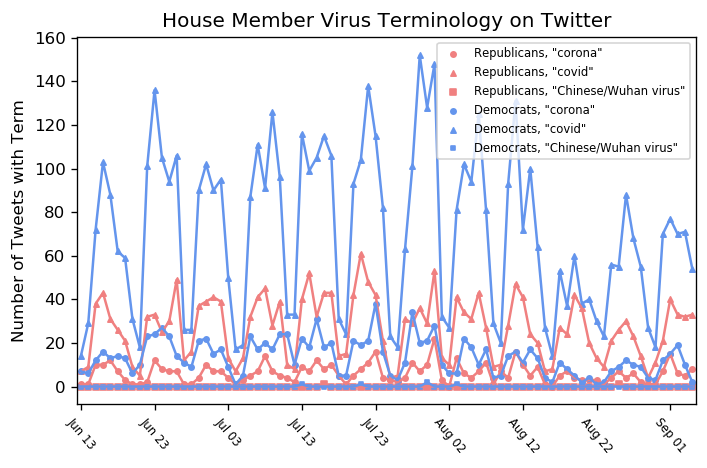

In [28]:
plt.figure(dpi=120)

plt.plot(t1,w1, c="lightcoral")
plt.scatter(t1,w1,c="lightcoral", marker='o', s=10, label = "Republicans, \"corona\"")
plt.plot(t2,w2, c="lightcoral")
plt.scatter(t2,w2,c="lightcoral", marker='^', s=10, label = "Republicans, \"covid\"")

w9_10 = np.add(w9,w10)
plt.plot(t9,w9_10, c="lightcoral")
plt.scatter(t9,w9_10,c="lightcoral", marker='s', s=10, label = "Republicans, \"Chinese/Wuhan virus\"")

plt.plot(t3,w3, c="cornflowerblue")
plt.scatter(t3,w3,c="cornflowerblue", marker='o', s=10, label = "Democrats, \"corona\"")
plt.plot(t4,w4, c="cornflowerblue")
plt.scatter(t4,w4,c="cornflowerblue", marker='^', s=10, label = "Democrats, \"covid\"")

w11_12 = np.add(w11,w12)
plt.plot(t11,w11_12, c="cornflowerblue")
plt.scatter(t11,w11_12,c="cornflowerblue", marker='s', s=5, label = "Democrats, \"Chinese/Wuhan virus\"")

t_fmtd = []
for date in t1[::10]: t_fmtd.append(date.strftime("%b %d"))

plt.xticks(t1[::10], t_fmtd, rotation=-50, fontsize=7)

plt.title("House Member Virus Terminology on Twitter")
plt.ylabel("Number of Tweets with Term")
plt.legend(loc='best', fontsize='x-small')
plt.xlim([start - timedelta(0.5),end - timedelta(0.5)])
plt.tight_layout()
plt.savefig('Plots/House12weeks.png')
plt.show()

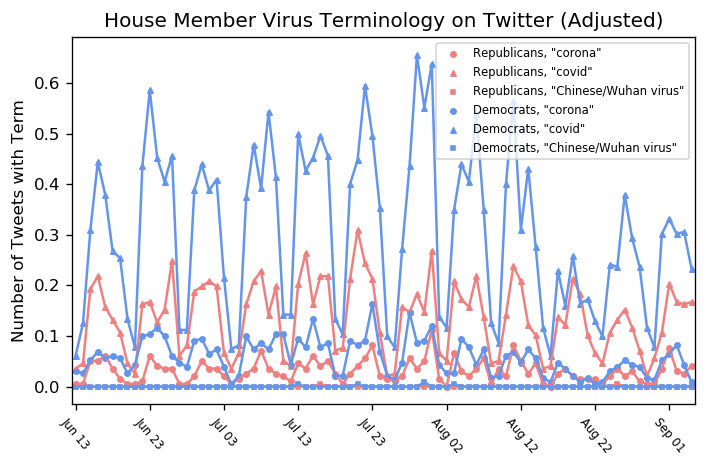

In [30]:
RHseats = 197
DHseats = 232

def list_adjust(w, seats):
    w_adj = []
    for val in w: w_adj.append(val/seats)
    return w_adj

w1adj = list_adjust(w1, RHseats)
w2adj = list_adjust(w2, RHseats)
w9adj = list_adjust(w9, RHseats)
w10adj = list_adjust(w10, RHseats)

w3adj = list_adjust(w3, DHseats)
w4adj = list_adjust(w4, DHseats)
w11adj = list_adjust(w11, DHseats)
w12adj = list_adjust(w12, DHseats)

plt.figure(dpi=120)

plt.plot(t1,w1adj, c="lightcoral")
plt.scatter(t1,w1adj,c="lightcoral", marker='o', s=10, label = "Republicans, \"corona\"")
plt.plot(t2,w2adj, c="lightcoral")
plt.scatter(t2,w2adj,c="lightcoral", marker='^', s=10, label = "Republicans, \"covid\"")

w9_10adj = np.add(w9adj,w10adj)
plt.plot(t9,w9_10adj, c="lightcoral")
plt.scatter(t9,w9_10adj,c="lightcoral", marker='s', s=5, label = "Republicans, \"Chinese/Wuhan virus\"")

plt.plot(t3,w3adj, c="cornflowerblue")
plt.scatter(t3,w3adj,c="cornflowerblue", marker='o', s=10, label = "Democrats, \"corona\"")
plt.plot(t4,w4adj, c="cornflowerblue")
plt.scatter(t4,w4adj,c="cornflowerblue", marker='^', s=10, label = "Democrats, \"covid\"")

w11_12adj = np.add(w11adj,w12adj)
plt.plot(t11,w11_12adj, c="cornflowerblue")
plt.scatter(t11,w11_12adj,c="cornflowerblue", marker='s', s=5, label = "Democrats, \"Chinese/Wuhan virus\"")

t_fmtd = []
for date in t1[::10]: t_fmtd.append(date.strftime("%b %d"))

plt.xticks(t1[::10], t_fmtd, rotation=-50, fontsize=7)

plt.title("House Member Virus Terminology on Twitter (Adjusted)")
plt.ylabel("Number of Tweets with Term")
plt.legend(loc='best', fontsize='x-small')
plt.xlim([start - timedelta(0.5),end - timedelta(0.5)])
plt.tight_layout()
plt.savefig('Plots/House12weeksADJUSTED.png')
plt.show()

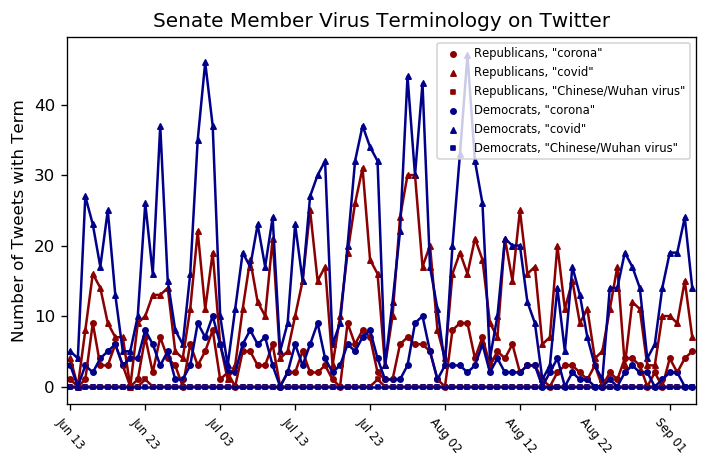

In [26]:
plt.figure(dpi=120)

plt.plot(t5,w5, c="darkred")
plt.scatter(t5,w5,c="darkred", marker='o', s=10, label = "Republicans, \"corona\"")
plt.plot(t6,w6, c="darkred")
plt.scatter(t6,w6,c="darkred", marker='^', s=10, label = "Republicans, \"covid\"")

w13_14 = np.add(w13,w14)
plt.plot(t13,w13_14, c="darkred")
plt.scatter(t13,w13_14,c="darkred", marker='s', s=5, label = "Republicans, \"Chinese/Wuhan virus\"")

plt.plot(t7,w7, c="darkblue")
plt.scatter(t7,w7,c="darkblue", marker='o', s=10, label = "Democrats, \"corona\"")
plt.plot(t8,w8, c="darkblue")
plt.scatter(t8,w8,c="darkblue", marker='^', s=10, label = "Democrats, \"covid\"")

w15_16 = np.add(w15,w16)
plt.plot(t15,w15_16, c="darkblue")
plt.scatter(t15,w15_16,c="darkblue", marker='s', s=5, label = "Democrats, \"Chinese/Wuhan virus\"")

t_fmtd = []
for date in t1[::10]: t_fmtd.append(date.strftime("%b %d"))

plt.xticks(t5[::10], t_fmtd, rotation=-50, fontsize=7)

plt.title("Senate Member Virus Terminology on Twitter")
plt.ylabel("Number of Tweets with Term")
plt.legend(loc='best', fontsize='x-small')
plt.xlim([start - timedelta(0.5),end - timedelta(0.5)])
plt.tight_layout()
plt.savefig('Plots/Senate12weeks.png')
plt.show()

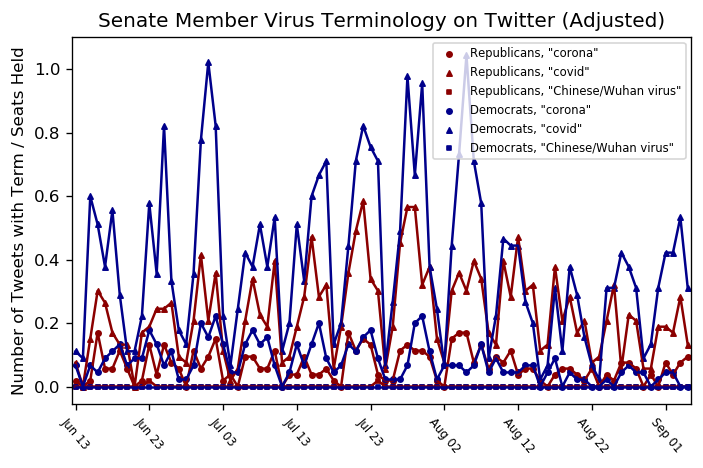

In [21]:
RSseats = 53
DSseats = 45

w5adj = list_adjust(w5, RSseats)
w6adj = list_adjust(w6, RSseats)
w13adj = list_adjust(w13, RSseats)
w14adj = list_adjust(w14, RSseats)

w7adj = list_adjust(w7, DSseats)
w8adj = list_adjust(w8, DSseats)
w15adj = list_adjust(w15, DSseats)
w16adj = list_adjust(w16, DSseats)

plt.figure(dpi=120)

plt.plot(t5,w5adj, c="darkred")
plt.scatter(t5,w5adj,c="darkred", marker='o', s=10, label = "Republicans, \"corona\"")
plt.plot(t6,w6adj, c="darkred")
plt.scatter(t6,w6adj,c="darkred", marker='^', s=10, label = "Republicans, \"covid\"")

w13_14adj = np.add(w13adj,w14adj)
plt.plot(t13,w13_14adj, c="darkred")
plt.scatter(t13,w13_14adj,c="darkred", marker='s', s=5, label = "Republicans, \"Chinese/Wuhan virus\"")

plt.plot(t7,w7adj, c="darkblue")
plt.scatter(t7,w7adj,c="darkblue", marker='o', s=10, label = "Democrats, \"corona\"")
plt.plot(t8,w8adj, c="darkblue")
plt.scatter(t8,w8adj,c="darkblue", marker='^', s=10, label = "Democrats, \"covid\"")

w15_16adj = np.add(w15adj,w16adj)
plt.plot(t15,w15_16adj, c="darkblue")
plt.scatter(t15,w15_16adj,c="darkblue", marker='s', s=5, label = "Democrats, \"Chinese/Wuhan virus\"")

t_fmtd = []
for date in t1[::10]: t_fmtd.append(date.strftime("%b %d"))

plt.xticks(t5[::10], t_fmtd, rotation=-50, fontsize=7)

plt.title("Senate Member Virus Terminology on Twitter (Adjusted)")
plt.ylabel("Number of Tweets with Term / Seats Held")
plt.legend(loc='best', fontsize='x-small')
plt.xlim([start - timedelta(0.5),end - timedelta(0.5)])
plt.tight_layout()
plt.savefig('Plots/Senate12weeksADJUSTED.png')
plt.show()

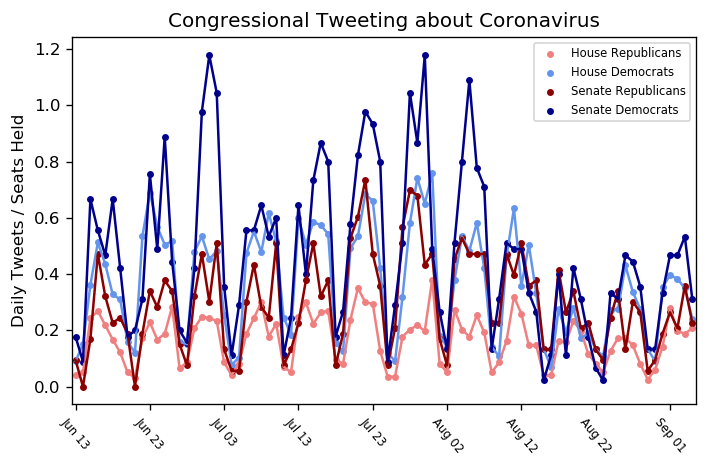

In [23]:
RHouseTotaladj = np.array(w1adj) + np.array(w2adj) + np.array(w9adj) + np.array(w10adj)
DHouseTotaladj = np.array(w3adj) + np.array(w4adj) + np.array(w11adj) + np.array(w12adj)
RSenateTotaladj = np.array(w5adj) + np.array(w6adj) + np.array(w13adj) + np.array(w14adj)
DSenateTotaladj = np.array(w7adj) + np.array(w8adj) + np.array(w15adj) + np.array(w16adj)

plt.figure(dpi=120)

plt.plot(t1, RHouseTotaladj, c='lightcoral')
plt.scatter(t1, RHouseTotaladj, c='lightcoral', s=10, label='House Republicans')

plt.plot(t1, DHouseTotaladj, c='cornflowerblue')
plt.scatter(t1, DHouseTotaladj, c='cornflowerblue', s=10, label='House Democrats')

plt.plot(t1, RSenateTotaladj, c='darkred')
plt.scatter(t1, RSenateTotaladj, c='darkred', s=10, label='Senate Republicans')

plt.plot(t1, DSenateTotaladj, c='darkblue')
plt.scatter(t1, DSenateTotaladj, c='darkblue', s=10, label='Senate Democrats')


t_fmtd = []

for date in t1[::10]: t_fmtd.append(date.strftime("%b %d")) #Marking the dates every 10 days

plt.xticks(t5[::10], t_fmtd, rotation=-50, fontsize=7)

plt.title("Congressional Tweeting about Coronavirus")
plt.ylabel("Daily Tweets / Seats Held")
plt.legend(loc='best', fontsize='x-small')
plt.xlim([start - timedelta(0.5),end - timedelta(0.5)])
plt.tight_layout()
plt.savefig('Plots/ALL12weeksAdjusted.png')
plt.show()

In [11]:
timescale = np.linspace(0, days-1, days)

RHint = integrate.simps(RHouseTotaladj, timescale)
DHint = integrate.simps(DHouseTotaladj, timescale)

RSint = integrate.simps(RSenateTotaladj, timescale)
DSint = integrate.simps(DSenateTotaladj, timescale)

print("House GOP:", RHint)
print("House Dems:", DHint)
print("Senate GOP:", RSint)
print("Senate Dems:", DSint)

House GOP: 13.986463620981386
House Dems: 30.395474137931036
Senate GOP: 24.880503144654085
Senate Dems: 39.27777777777778


In [31]:
RHavg = np.sum(RHouseTotaladj)/84 #number of days data scraped for
DHavg = np.sum(DHouseTotaladj)/84
RSavg = np.sum(RSenateTotaladj)/84
DSavg = np.sum(DSenateTotaladj)/84

print("House GOP:", round(RHavg,2))
print("House Dems:", round(DHavg,2))
print("Senate GOP:", round(RSavg,2))
print("Senate Dems:", round(DSavg,2))

House GOP: 0.17
House Dems: 0.36
Senate GOP: 0.3
Senate Dems: 0.47


In [13]:
## REQUIRES MANUAL UPDATE FOR NEW DATE RANGE

# GTsearches_corona = np.array([])
# GTsearches_covid = np.array([])
# GTsearches_chinese = np.array([])
# GTsearches_wuhan = np.array([])
# GTsearches_cw = np.array([])
# GTsearches_all = np.array([])
# GTdates = np.array([])

# with open('GoogleTrendsData.csv') as csv_file:
#         csv_reader = csv.reader(csv_file, delimiter=',')
#         idx = 0
        
#         for row in csv_reader:
#             if(idx>0):
#                 GTdates = np.append(GTdates, row[0])
#                 GTsearches_corona = np.append(GTsearches_corona, int(row[1]))
#                 GTsearches_covid = np.append(GTsearches_covid, int(row[2]))
#                 GTsearches_chinese = np.append(GTsearches_chinese, int(row[3]))
#                 GTsearches_wuhan = np.append(GTsearches_wuhan, int(row[4]))
            
#             idx+=1
            
# def convertDates(l, f): 
#     retVal = np.array([])
#     for val in l: 
#         retVal = np.append(retVal, datetime.strptime(val, f))
#     return retVal

# GTdates = convertDates(GTdates, "%m/%d/%Y")
# GTsearches_cw = GTsearches_chinese + GTsearches_wuhan

# GTdates = GTdates[6:-1]
# GTsearches_corona = GTsearches_corona[6:-1]
# GTsearches_covid = GTsearches_covid[6:-1]
# GTsearches_cw = GTsearches_cw[6:-1]
# GTsearches_all = GTsearches_corona + GTsearches_covid + GTsearches_cw

In [14]:
## REQUIRES MANUAL UPDATE FOR NEW DATE RANGE

# plt.figure(dpi=120)
# plt.plot(GTdates, GTsearches_all, label='All terms')
# plt.plot(GTdates, GTsearches_corona, label='Searches for \"corona\"')
# plt.plot(GTdates, GTsearches_covid, label='Searches for \"covid\"')
# plt.plot(GTdates, GTsearches_cw, label='Searches for \"wuhan virus\" or \"chinese virus\"')

# GTdates_fmtd = []
# for date in GTdates: GTdates_fmtd.append(date.strftime("%b %d"))

# plt.xticks(GTdates, GTdates_fmtd, rotation=-50, fontsize=7)

# plt.title("Google Search Interest for Coronavirus and Related Terms")
# plt.xlabel("Date")
# plt.ylabel("Interest")
# plt.legend(loc='best', fontsize='x-small')
# plt.xlim([GTdates[0] - timedelta(0.5),GTdates[-1] + timedelta(0.5)])
# plt.tight_layout()
# plt.savefig('Plots/GoogleTrends.png')
# plt.show()

# plt.show()

In [4]:
import csv
from datetime import datetime
def writeData():

    filename = 'Data/TwitterData_' + datetime.now().strftime("%d-%m-%Y-%H-%M") + '.csv'
    with open(filename, 'wb') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                                quotechar='|', quoting=csv.QUOTE_MINIMAL)

Data/TwitterData_04-10-2020-20-45.csv
